In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# if file is in the same directory
df = pd.read_csv('nba_2025_per_game.csv')


df.head()  # display first few rows


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1,Shai Gilgeous-Alexander,26,OKC,PG,76,76,34.2,11.3,21.8,...,0.9,4.1,5,6.4,1.7,1,2.4,2.2,32.7,NaN
1,2,Giannis Antetokounmpo,30,MIL,PF,67,67,34.2,11.8,19.7,...,2.2,9.7,11.9,6.5,0.9,1.2,3.1,2.3,30.4,NaN
2,3,Nikola Jokić,29,DEN,C,70,70,36.7,11.2,19.5,...,2.9,9.9,12.7,10.2,1.8,0.6,3.3,2.3,29.6,NaN
3,4,Luka Dončić,25,2TM,PG,50,50,35.4,9.2,20.5,...,0.8,7.4,8.2,7.7,1.8,0.4,3.6,2.5,28.2,NaN
4,4,Luka Dončić,25,DAL,PG,22,22,35.7,9.8,21.2,...,0.7,7.6,8.3,7.8,2,0.4,3.4,2.6,28.1,NaN


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
!git config --global user.name "evanjgeppert"
!git config --global user.email "evanjgeppert@gmail.com"

In [7]:
print(df.columns)  # print column names

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')


In [8]:
df2 = pd.read_csv('Team_Stats_Per_Game.csv')
df2.head()  # display first few rows

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Cleveland Cavaliers*,82,240.9,44.5,90.8,0.491,15.9,41.5,0.383,...,0.776,11.2,34.2,45.4,28.1,8.2,4.3,13.2,18.1,121.9
1,2.0,Memphis Grizzlies*,82,240.3,44.8,93.3,0.479,13.9,37.9,0.367,...,0.786,12.9,34.4,47.3,28.4,8.9,5.6,15.7,20.9,121.7
2,3.0,Denver Nuggets*,82,242.1,45.4,89.8,0.506,12.0,31.9,0.376,...,0.770,11.2,34.5,45.7,31.0,8.0,4.9,14.3,17.6,120.8
3,4.0,Oklahoma City Thunder*,82,240.3,44.6,92.7,0.482,14.5,38.8,0.374,...,0.819,10.6,34.2,44.8,26.9,10.3,5.7,11.7,19.9,120.5
4,5.0,Atlanta Hawks*,82,241.2,43.4,91.8,0.472,13.5,37.7,0.358,...,0.775,11.9,32.6,44.5,29.6,9.7,5.1,15.5,19.1,118.2


In [9]:
print(df2.columns)  # print column names

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [10]:
df3 = pd.read_csv('team_stats.csv')
df3.head()  # display first few rows

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Cleveland Cavaliers*,82,240.9,44.5,90.8,0.491,15.9,41.5,0.383,...,0.776,11.2,34.2,45.4,28.1,8.2,4.3,13.2,18.1,121.9
1,2.0,Memphis Grizzlies*,82,240.3,44.8,93.3,0.479,13.9,37.9,0.367,...,0.786,12.9,34.4,47.3,28.4,8.9,5.6,15.7,20.9,121.7
2,3.0,Denver Nuggets*,82,242.1,45.4,89.8,0.506,12.0,31.9,0.376,...,0.770,11.2,34.5,45.7,31.0,8.0,4.9,14.3,17.6,120.8
3,4.0,Oklahoma City Thunder*,82,240.3,44.6,92.7,0.482,14.5,38.8,0.374,...,0.819,10.6,34.2,44.8,26.9,10.3,5.7,11.7,19.9,120.5
4,5.0,Atlanta Hawks*,82,241.2,43.4,91.8,0.472,13.5,37.7,0.358,...,0.775,11.9,32.6,44.5,29.6,9.7,5.1,15.5,19.1,118.2


In [11]:
print(df3.columns)  # print column names

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [12]:
df4 = pd.read_csv('win_loss.csv')
df4.head()  # display first few rows

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Unnamed: 4,Conference,Unnamed: 6,Division,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Margin,Unnamed: 16,Month,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Oklahoma City Thunder,68-14,36-6,32-8,29-1,39-13,Oct-00,1-Sep,Oct-00,...,24-4,4-Jan,54-5,Apr-00,4-Nov,1-Dec,4-Oct,2-Nov,15-1,2-May
2,2,Cleveland Cavaliers,64-18,34-7,30-11,41-11,23-7,16-3,4-Dec,13-4,...,20-8,4-May,41-7,May-00,3-Dec,1-Dec,5-Oct,1-Oct,5-Nov,3-Apr
3,3,Boston Celtics,61-21,28-13,33-8,39-13,22-8,14-2,6-Dec,13-5,...,22-5,3-Aug,41-7,1-Apr,2-Dec,6-Aug,6-Oct,3-Aug,14-1,2-May
4,4,Houston Rockets,52-30,29-12,23-18,21-9,31-21,4-Jun,3-Jul,2-Aug,...,18-9,5-Aug,26-12,2-Mar,4-Nov,5-Jul,4-Nov,7-May,5-Dec,3-Mar


In [13]:
df4.columns = df4.iloc[0]  # set the first row as the header
df4 = df4.drop(0)  # drop the first row
df4 = df4.reset_index(drop=True)  # reset the index

print(df4.columns)  # print column names

Index(['Rk', 'Team', 'Overall', 'Home', 'Road', 'E', 'W', 'A', 'C', 'SE', 'NW',
       'P', 'SW', 'Pre', 'Post', '≤3', '≥10', 'Oct', 'Nov', 'Dec', 'Jan',
       'Feb', 'Mar', 'Apr'],
      dtype='object', name=0)


In [14]:
df5 = pd.read_csv('Win_Loss_Offense_Defence.csv')
df5.head()  # display first few rows

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Defense Four Factors,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA,NaN,Arena,Attend.,Attend./G
1,1,Oklahoma City Thunder*,24.8,68,14,68,14,12.87,-0.16,12.7,...,0.18,NaN,0.513,14.9,74.6,0.211,NaN,Paycom Center,"754,832","17,973"
2,2,Boston Celtics*,28.9,61,21,62,20,9.11,-0.83,8.28,...,0.169,NaN,0.522,11.6,76,0.154,NaN,TD Garden,"785,396","19,156"
3,3,Cleveland Cavaliers*,26.6,64,18,62,20,9.54,-0.73,8.81,...,0.187,NaN,0.528,12.6,74.8,0.181,NaN,Rocket Arena,"796,712","19,432"
4,4,Minnesota Timberwolves*,27.2,49,33,53,29,5,0.15,5.15,...,0.196,NaN,0.532,13.2,75.1,0.178,NaN,Target Center,"772,249","18,835"


In [ ]:
df5.columns = df5.iloc[0]  # set the first row as the header
df5 = df5.drop(0)  # drop the first row
df5 = df5.reset_index(drop=True)  # reset the index
print(df5.columns)  # print column names


Index([       'Rk',      'Team',       'Age',         'W',         'L',
              'PW',        'PL',       'MOV',       'SOS',       'SRS',
            'ORtg',      'DRtg',      'NRtg',      'Pace',       'FTr',
            '3PAr',       'TS%',         nan,      'eFG%',      'TOV%',
            'ORB%',    'FT/FGA',         nan,      'eFG%',      'TOV%',
            'DRB%',    'FT/FGA',         nan,     'Arena',   'Attend.',
       'Attend./G'],
      dtype='object', name=0)


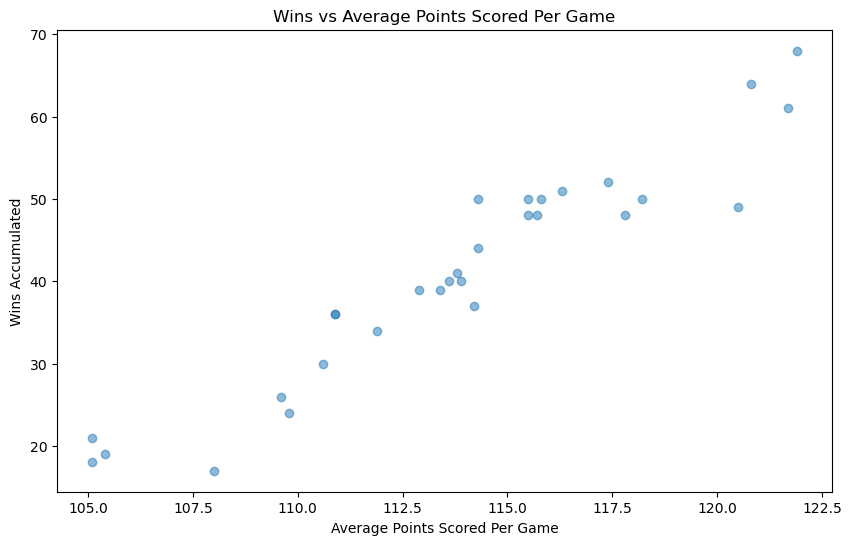

In [16]:
df2['PTS'] = pd.to_numeric(df2['PTS'], errors='coerce')
df5['W'] = pd.to_numeric(df5['W'], errors='coerce')

valid_data = df2[['PTS']].join(df5[['W']]).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(valid_data['PTS'], valid_data['W'], alpha=0.5)
plt.xlabel('Average Points Scored Per Game')
plt.ylabel('Wins Accumulated')
plt.title('Wins vs Average Points Scored Per Game')
plt.show()

In [17]:
df5['PW'] = pd.to_numeric(df5['PW'], errors='coerce')
df5['DRB%'] = pd.to_numeric(df5['DRB%'], errors='coerce')

correlation_coefficient = df5['PW'].corr(df5['DRB%'])
print(f"Correlation Coefficient between Points Won and Defensive Rebound Percentage: {correlation_coefficient:.2f}")


Correlation Coefficient between Points Won and Defensive Rebound Percentage: 0.53


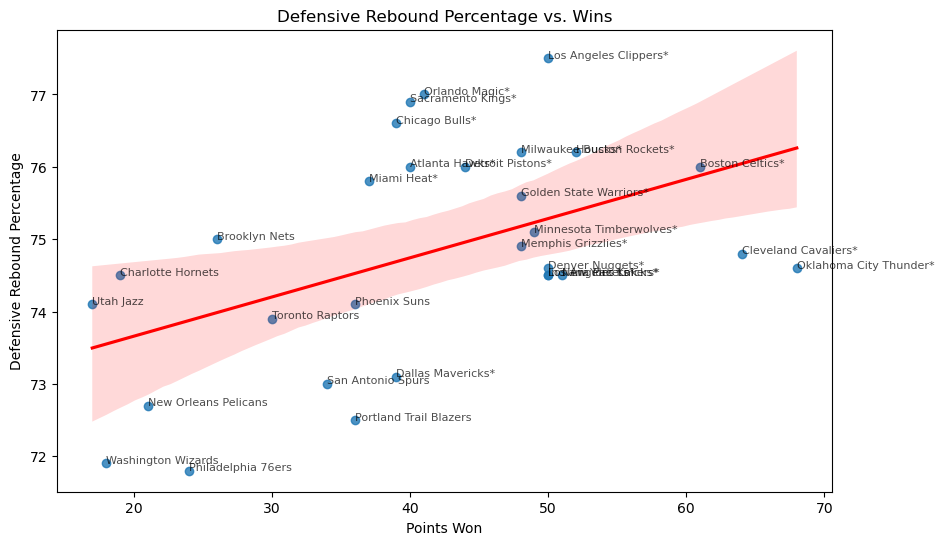

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='W', y='DRB%', data=df5, line_kws={'color': 'red'})
plt.xlabel('Points Won')
plt.ylabel('Defensive Rebound Percentage')
for idx, team in enumerate(df5['Team']):
    plt.annotate(team, (df5['W'][idx], df5['DRB%'][idx]), fontsize=8, alpha=0.7)
plt.title('Defensive Rebound Percentage vs. Wins')
plt.show()

In [21]:
player_df = pd.read_csv('nba_2025_per_game.csv')

# Convert relevant columns to numeric, errors='coerce' will turn non-numeric values into NaN
cols_to_numeric = [
    'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%', 'ORB', 'DRB', 'MP', 'FGA', 'FG'
]
player_df[cols_to_numeric] = player_df[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

team_stats = player_df.groupby('Team').agg({
    'PTS': 'mean',
    'AST': 'mean',
    'TRB': 'mean',
    'STL': 'mean',
    'BLK': 'mean',
    'TOV': 'mean',
    'FG%': 'mean',
    '3P%': 'mean',
    'FT%': 'mean',
    'ORB': 'mean',
    'DRB': 'mean',
    'TRB': 'mean',
    'MP': 'mean',
    'FGA': 'mean',
    'FG': 'mean',
}).reset_index()

In [31]:
import numpy as np

# Use df5 as the wins dataframe
team_wins_df = df5

# Remove non-team rows from team_stats (e.g., summary or 'Team' rows)
team_stats_clean = team_stats[~team_stats['Team'].isin(['Team', 'League Average'])].copy()

# Remove non-team rows from team_wins_df (e.g., header or summary rows)
team_wins_df_clean = team_wins_df[~team_wins_df['Team'].isin(['Team', 'League Average', None, np.nan])].copy()

# Standardize 'Team' names for merging (remove trailing '*' and strip whitespace)
team_stats_clean['Team'] = team_stats_clean['Team'].str.replace('*', '', regex=False).str.strip()
team_wins_df_clean['Team'] = team_wins_df_clean['Team'].str.replace('*', '', regex=False).str.strip()

# Mapping from abbreviation to full team name
abbr_to_full = {
    "ATL": "Atlanta Hawks",
    "BOS": "Boston Celtics",
    "BRK": "Brooklyn Nets",
    "CHI": "Chicago Bulls",
    "CHO": "Charlotte Hornets",
    "CLE": "Cleveland Cavaliers",
    "DAL": "Dallas Mavericks",
    "DEN": "Denver Nuggets",
    "DET": "Detroit Pistons",
    "GSW": "Golden State Warriors",
    "HOU": "Houston Rockets",
    "IND": "Indiana Pacers",
    "LAC": "Los Angeles Clippers",
    "LAL": "Los Angeles Lakers",
    "MEM": "Memphis Grizzlies",
    "MIA": "Miami Heat",
    "MIL": "Milwaukee Bucks",
    "MIN": "Minnesota Timberwolves",
    "NOP": "New Orleans Pelicans",
    "NYK": "New York Knicks",
    "OKC": "Oklahoma City Thunder",
    "ORL": "Orlando Magic",
    "PHI": "Philadelphia 76ers",
    "PHO": "Phoenix Suns",
    "POR": "Portland Trail Blazers",
    "SAC": "Sacramento Kings",
    "SAS": "San Antonio Spurs",
    "TOR": "Toronto Raptors",
    "UTA": "Utah Jazz",
    "WAS": "Washington Wizards"
}

# Map abbreviations to full names for merging
team_stats_clean['Team_Full'] = team_stats_clean['Team'].map(abbr_to_full)
# Drop rows where mapping failed (e.g., '2TM', '3TM', etc.)
team_stats_clean = team_stats_clean.dropna(subset=['Team_Full'])

# Merge using the mapped full team names
data = pd.merge(
    team_stats_clean,
    team_wins_df_clean[['Team', 'W']],
    left_on='Team_Full',
    right_on='Team',
    how='inner'
)

if data.shape[0] == 0:
    raise ValueError("No matching teams found after cleaning. Check team name formatting.")

X = data[[
    'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%', 'ORB', 'DRB', 'MP', 'FGA', 'FG'
]]
Y = data['W']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [32]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)


In [34]:
print("Model R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("/nFeature Coefficients (Importance):")
print(coefficients)

Model R^2 Score: -0.5756077640007653
Mean Squared Error: 74.4036999667028
/nFeature Coefficients (Importance):
   Feature  Coefficient
6      FG%  -142.052201
2      TRB   131.934427
10     DRB  -121.616585
9      ORB  -109.095545
8      FT%   -77.245718
7      3P%   -73.027921
3      STL    52.682067
5      TOV   -51.395232
0      PTS    43.447270
4      BLK   -33.554181
13      FG   -33.059116
12     FGA   -29.920118
1      AST     6.557957
11      MP    -5.877957
